In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
import combinators.model as model
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example
import examples.ais.image_density as image_density

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
from scipy.misc import imread
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

img_ary = imread('examples/ais/probtorch-logo-bw.png', mode='L').astype(float)
img_ary = gaussian_filter(img_ary, sigma=1)

In [6]:
ANNEALING_STEPS = 50

In [7]:
BATCH_SHAPE = (10000,)

In [8]:
proposal = image_density.AnnealingProposal(image_density.ImageProposal(batch_shape=BATCH_SHAPE), ANNEALING_STEPS)

In [9]:
target = model.Compose(image_density.ProbtorchLogoDensity(batch_shape=BATCH_SHAPE), proposal)

In [10]:
ais = ais_example.annealed_importance(target, kernel.GaussianKernel('ProbtorchLogoDensity.ImageProposal/ImageProposal', 'ImageProposal', scale=1.0), moves=ANNEALING_STEPS)

In [11]:
annealed_points, trace, log_weight = ais(data={'image': torch.FloatTensor(img_ary)})

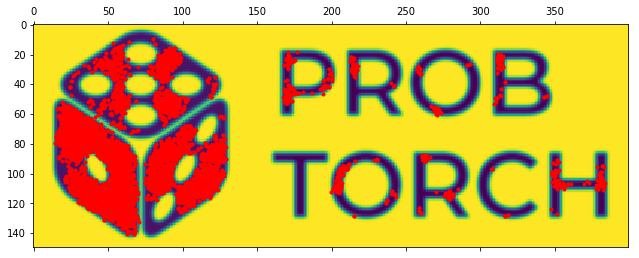

In [12]:
plt.matshow(img_ary)
plt.scatter(annealed_points[:, 0], annealed_points[:, 1], c='r', marker='.')
plt.savefig('probtorch_logo_ais.pdf')